# Inaugural Project

Imports and set magics:

In [11]:
import numpy as np

from types import SimpleNamespace
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

from inauguralproject import HouseholdClass 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "/Users/simoneruthflindhardt/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/simoneruthflindhardt/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/simoneruthflindhardt/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/simoneruthflindhardt/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bo

# Question 1

**Explain how you solve the model**

We have changed the definition of consumption of home goods in line 58-65 in inauguralproject.py, to allow for sigma not being equal to 1.

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home.

In [4]:
model = HouseholdClass()
initial = model.solve_discrete()
print(initial)

namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)


/Users/simoneruthflindhardt/Documents/Universitetet/8 semester/Programming/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In the following, we describe how optimal hours in the market and in the home changes dependent on different values of sigma and alpha. We also report the relative relationsship between hours worked at home for men and women.

In [4]:
par = model.par

alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

loop=[]
for i in sigma_vec:
    par.sigma = i
    for j in alpha_vec:
        par.alpha = j
        opt = model.solve_discrete()

        fraction = opt.HF/opt.HM
        loop.append(fraction)
        print(f' if sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}     H_F / H_M is {fraction:.2f}')


print(loop)

/Users/simoneruthflindhardt/Documents/Universitetet/8 semester/Programming/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/simoneruthflindhardt/Documents/Universitetet/8 semester/Programming/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 if sigma = 0.50 and alpha = 0.25     H_F / H_M is 0.55
 if sigma = 0.50 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 0.50 and alpha = 0.75     H_F / H_M is 1.83
 if sigma = 1.00 and alpha = 0.25     H_F / H_M is 0.31
 if sigma = 1.00 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 1.00 and alpha = 0.75     H_F / H_M is 3.25
 if sigma = 1.50 and alpha = 0.25     H_F / H_M is 0.21
 if sigma = 1.50 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 1.50 and alpha = 0.75     H_F / H_M is 4.67
[0.5454545454545454, 1.0, 1.8333333333333333, 0.3076923076923077, 1.0, 3.25, 0.21428571428571427, 1.0, 4.666666666666667]


____

In [ ]:
def print_table(alpha_vec,sigma_vec): # brøken i opg 1
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, sigma in enumerate(sigma_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i,alpha in enumerate(alpha_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, sigma in enumerate(sigma_vec):
            text += f'{frac(alpha,sigma):6.3f}'
    
    # d. print
    print(text)

print_table(alpha_vec,sigma_vec)

In [ ]:
# evaluate utility function
alpha_grid,sigma_grid = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
frac_grid = frac(alpha_grid,sigma_grid)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha_grid,sigma_grid,frac_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$alpha$')
ax.set_ylabel('$sigma$')
ax.set_zlabel('$frac,HF/HM$')

# c. invert xaxis
ax.invert_xaxis()

# Question 2

Explain your code and procedure

In [5]:
model2 = HouseholdClass()

par = model2.par

log_rel_hours_list=[]
#log_rel_wage_list=[]

for wage in par.wF_vec:
    par.wF = wage
    opt = model2.solve_discrete()    

    rel_hours = opt.HF/opt.HM
    log_rel_hours = np.log(rel_hours)

    log_rel_wage = np.log(par.wF_vec)

    log_rel_hours_list = np.append(log_rel_hours_list, log_rel_hours)
    #log_rel_wage_list = np.append(log_rel_wage_list, log_rel_wage)   
    print(f'rel_hours = {rel_hours:.3f}     log_rel_hours = {log_rel_hours:.3f}     wF = {wage:.3f}   HF = {opt.HF:.3f}   HM = {opt.HM:.3f}   wM = {par.wM:.3f}')


print(log_rel_hours_list)

log_rel_wage_list=[par.wF_vec/par.wM]
print(log_rel_wage_list)

rel_hours = 1.250     log_rel_hours = 0.223     wF = 0.800   HF = 5.000   HM = 4.000   wM = 1.000
rel_hours = 1.000     log_rel_hours = 0.000     wF = 0.900   HF = 4.500   HM = 4.500   wM = 1.000
rel_hours = 1.000     log_rel_hours = 0.000     wF = 1.000   HF = 4.500   HM = 4.500   wM = 1.000
rel_hours = 0.889     log_rel_hours = -0.118     wF = 1.100   HF = 4.000   HM = 4.500   wM = 1.000
rel_hours = 0.800     log_rel_hours = -0.223     wF = 1.200   HF = 4.000   HM = 5.000   wM = 1.000
[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[array([0.8, 0.9, 1. , 1.1, 1.2])]


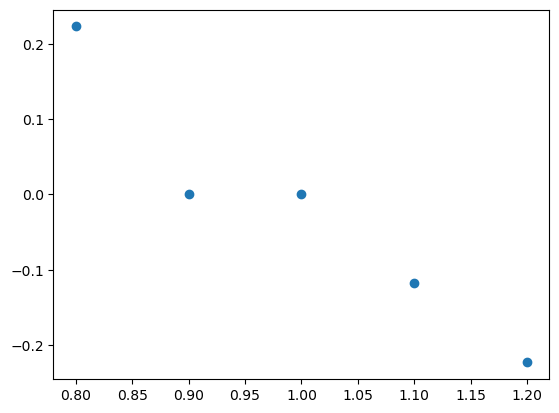

In [6]:
plt.scatter(log_rel_wage_list,log_rel_hours_list)
plt.show()




ValueError: x and y must have same first dimension, but have shapes (5,) and (1, 5)

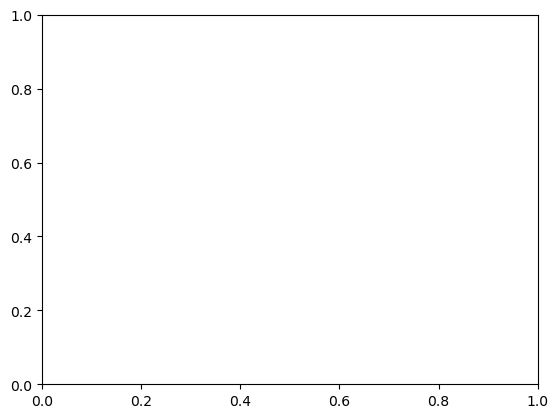

In [7]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_rel_hours_list,log_rel_wage_list)

ax.set_title('lol')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,1)$');

Explain your code and procedure

In [33]:

model.par.alpha = 0.5
model.par.sigma = 1


# Question 3

In [1]:
kont = model_obj.solve()

NameError: name 'model_obj' is not defined

In [2]:
kont

NameError: name 'kont' is not defined

# Question 4


In [3]:
model4 = HouseholdClass()
model4.run_regression()

** On entry to DGELSD, parameter number  6 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

# Question 5

ADD CONCISE CONLUSION.